In [2]:
import pandas as pd
import numpy as np
import string
import re

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [4]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df = pd.read_csv(
    "spam.csv",
    sep="\t",
    header=None,
    names=["label", "message"],
    encoding="latin-1"
)

In [6]:
df["label"] = df["label"].map({
    "ham": 0,
    "spam": 1
})

In [7]:
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (5572, 2)


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
stop_words = set(stopwords.words("english"))

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [10]:
df["cleaned_message"] = df["message"].apply(clean_text)

In [11]:
X = df["cleaned_message"]
y = df["label"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [13]:
count_vectorizer = CountVectorizer()

In [14]:
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [15]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "SVM": LinearSVC()
}

In [16]:
print("----- CountVectorizer Results -----")

----- CountVectorizer Results -----


In [17]:
for name, model in models.items():
    model.fit(X_train_count, y_train)
    y_pred = model.predict(X_test_count)

    print("\nModel:", name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Model: Naive Bayes
Accuracy: 0.9856424982053122
Confusion Matrix:
 [[1200    7]
 [  13  173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1207
           1       0.96      0.93      0.95       186

    accuracy                           0.99      1393
   macro avg       0.98      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393


Model: Logistic Regression
Accuracy: 0.9834888729361091
Confusion Matrix:
 [[1207    0]
 [  23  163]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1207
           1       1.00      0.88      0.93       186

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393


Model: SVM
Accuracy: 0.9856424982053122
Confusion Matrix:
 [[1207    0]
 [  20  166]]
Classificatio

In [18]:
tfidf_vectorizer = TfidfVectorizer()

In [19]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [20]:
print("----- TF-IDF Results -----")

----- TF-IDF Results -----


In [21]:
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    print("\nModel:", name)
    print("Accuracy:", accuracy_score(y_test, y_pred))


Model: Naive Bayes
Accuracy: 0.968413496051687

Model: Logistic Regression
Accuracy: 0.9605168700646087

Model: SVM
Accuracy: 0.9877961234745154


In [22]:
count_accuracies = []
tfidf_accuracies = []

In [23]:
for model in models.values():
    model.fit(X_train_count, y_train)
    count_accuracies.append(accuracy_score(y_test, model.predict(X_test_count)))

for model in models.values():
    model.fit(X_train_tfidf, y_train)
    tfidf_accuracies.append(accuracy_score(y_test, model.predict(X_test_tfidf)))

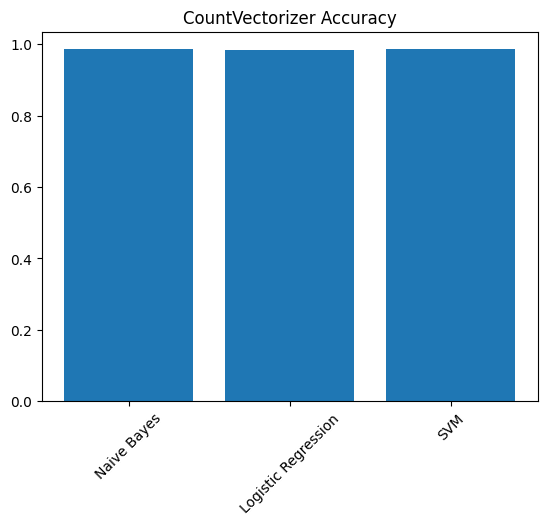

In [24]:
plt.figure()
plt.bar(models.keys(), count_accuracies)
plt.title("CountVectorizer Accuracy")
plt.xticks(rotation=45)
plt.show()

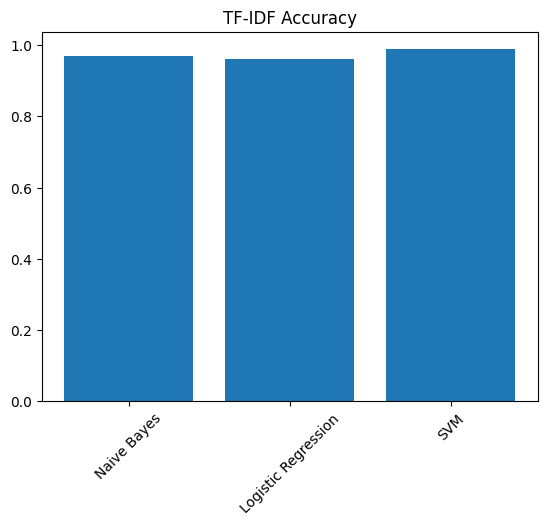

In [25]:
plt.figure()
plt.bar(models.keys(), tfidf_accuracies)
plt.title("TF-IDF Accuracy")
plt.xticks(rotation=45)
plt.show()

In [26]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_tfidf, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [27]:
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
coefficients = model.coef_[0]

In [28]:
top_spam_words = feature_names[np.argsort(coefficients)[-15:]]
top_ham_words = feature_names[np.argsort(coefficients)[:15]]

In [29]:
print("Top Spam Words:\n", top_spam_words)
print("\nTop Ham Words:\n", top_ham_words)

Top Spam Words:
 ['500' 'customer' '18' 'new' 'prize' 'service' 'win' 'reply' 'call' 'text'
 'mobile' 'free' 'claim' 'stop' 'txt']

Top Ham Words:
 ['im' 'ltgt' 'ok' 'ill' 'later' 'come' 'sir' 'sorry' 'home' 'da' 'got'
 'lor' 'still' 'going' 'oh']
